In [23]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [11]:
myfiles = [x for x in os.listdir() if x.endswith("-CDR3.csv")]
myfiles

['AAGCGAGT-10000_S1.assembled.fastq.gz-IGH_HUMAN-CDR3.csv',
 'AAGCGAGT-100000_S1.assembled.fastq.gz-IGH_HUMAN-CDR3.csv',
 'AAGCGAGT-1000000_S1.assembled.fastq.gz-IGH_HUMAN-CDR3.csv',
 'AAGCGAGT-500000_S1.assembled.fastq.gz-IGH_HUMAN-CDR3.csv',
 'AAGCGAGT-50000_S1.assembled.fastq.gz-IGH_HUMAN-CDR3.csv',
 'AAGCGAGT-5000_S1.assembled.fastq.gz-IGH_HUMAN-CDR3.csv']

In [12]:
df_ufis = pd.read_csv('AAGCGAGT_S1_L001_R1_001-mapped-ufis.csv', header=None, sep="\t")
df_ufis = df_ufis.rename(columns={0: 'acc', 1: 'ufi'})
df_ufis.head()

,acc,ufi
0,ST-E00127:1241:HHKC7CCX2:5:1101:4148:2487,TTTCAC
1,ST-E00127:1241:HHKC7CCX2:5:1101:14844:2557,CCATAG
2,ST-E00127:1241:HHKC7CCX2:5:1101:28260:2557,ACTTGC
3,ST-E00127:1241:HHKC7CCX2:5:1101:18670:2645,GTTGTA
4,ST-E00127:1241:HHKC7CCX2:5:1101:24850:2663,AAGGGT


In [15]:
def readCdr3(f):
    c = f.split("-")
    barcode = c[0]
    sequences = int(c[1].split("_")[0])
    chain = c[2].replace("_HUMAN", "")
    df = pd.read_csv(f, header=None, sep="\t")
    df = df.rename(columns={0: 'acc', 4: 'cdr3'})
    df['barcode'] = barcode
    df['sequences'] = sequences
    df['chain'] = chain
    cols = ['barcode', 'sequences', 'chain', 'acc', 'cdr3']
    df = df[cols]
    return(df)

In [16]:
df_cdr3 = readCdr3(myfiles[0])
for f in myfiles[1:]:
    df_cdr3 = pd.concat([df_cdr3, readCdr3(f)])

In [18]:
df_cdr3.head()

,barcode,sequences,chain,acc,cdr3
0,AAGCGAGT,10000,IGH,ST-E00127:1241:HHKC7CCX2:5:1214:26778:2909,CASPLTLSKSYW
1,AAGCGAGT,10000,IGH,ST-E00127:1241:HHKC7CCX2:5:1222:5051:31160,CASPLTLSKSYW
2,AAGCGAGT,10000,IGH,ST-E00127:1241:HHKC7CCX2:5:1112:9080:28576,CASPLTLSKSYW
3,AAGCGAGT,10000,IGH,ST-E00127:1241:HHKC7CCX2:5:1205:24454:18854,CASPLTLSKSYW
4,AAGCGAGT,10000,IGH,ST-E00127:1241:HHKC7CCX2:5:2122:8978:67357,CASPLTLSKSYW


In [19]:
df_cdr3.tail()

,barcode,sequences,chain,acc,cdr3
21,AAGCGAGT,50000,IGH,ST-E00127:1241:HHKC7CCX2:5:2120:23378:69590,CASPLTLSKSYW
0,AAGCGAGT,5000,IGH,ST-E00127:1241:HHKC7CCX2:5:2113:11627:48318,CASPLTLSKSYW
1,AAGCGAGT,5000,IGH,ST-E00127:1241:HHKC7CCX2:5:2207:20659:57671,CASPLTLSKSYW
2,AAGCGAGT,5000,IGH,ST-E00127:1241:HHKC7CCX2:5:1102:23460:48775,CASPLTLSKSYW
3,AAGCGAGT,5000,IGH,ST-E00127:1241:HHKC7CCX2:5:2115:15118:45154,CASPLTLSKSYW


## Link ufis to cdr3s

In [20]:
df = pd.merge(df_cdr3, df_ufis, how='left', on='acc')
df.head()

,barcode,sequences,chain,acc,cdr3,ufi
0,AAGCGAGT,10000,IGH,ST-E00127:1241:HHKC7CCX2:5:1214:26778:2909,CASPLTLSKSYW,GGCGGT
1,AAGCGAGT,10000,IGH,ST-E00127:1241:HHKC7CCX2:5:1222:5051:31160,CASPLTLSKSYW,TGGGAC
2,AAGCGAGT,10000,IGH,ST-E00127:1241:HHKC7CCX2:5:1112:9080:28576,CASPLTLSKSYW,TAAACA
3,AAGCGAGT,10000,IGH,ST-E00127:1241:HHKC7CCX2:5:1205:24454:18854,CASPLTLSKSYW,CTCGAG
4,AAGCGAGT,10000,IGH,ST-E00127:1241:HHKC7CCX2:5:2122:8978:67357,CASPLTLSKSYW,GCGCGT


## Count ufis

In [25]:
df_summary = df.groupby(['barcode', 'sequences', 'chain']).agg({'cdr3': 'nunique', 'ufi': 'nunique'}).reset_index()
df_summary

,barcode,sequences,chain,cdr3,ufi
0,AAGCGAGT,5000,IGH,1,4
1,AAGCGAGT,10000,IGH,2,8
2,AAGCGAGT,50000,IGH,5,20
3,AAGCGAGT,100000,IGH,7,49
4,AAGCGAGT,500000,IGH,29,176
5,AAGCGAGT,1000000,IGH,43,215


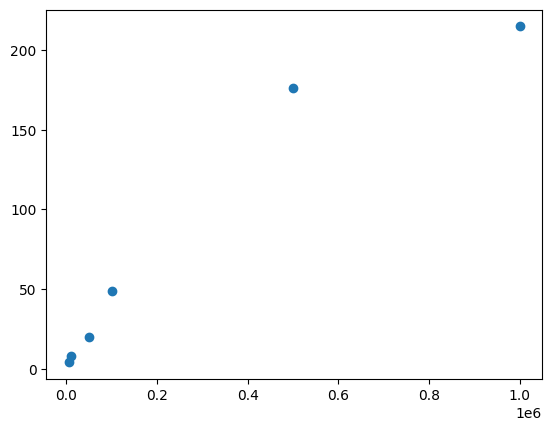

In [27]:
plt.scatter(df_summary['sequences'], df_summary['ufi'])
plt.show()